# Parte 1) Datos del enunciado generales

In [824]:
!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [825]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

ri = 0.025  # radio interno tuberia
re = 0.0275  # radio externo tuberia
k_acero = 20.0
k_aislante = 1.1
hi = 2500.0  # coeficiente de conveccion interna
he = 100.0  # coeficiente de conveccion externa
T_agua_inf = 80.0  # Temperatura en el infinito del agua
T_aire_inf = 15.0  # Temperatura en el infinito del aire

In [826]:
def resolver_problema_sin_aislante(r, dr):
  #dado un arreglo de posiciones de nodos, y un paso de discretizacion dr, resolvemos el problema mencionado por el trabajo práctico
  # inicializo la matriz
  N = len(r)
  A = np.zeros((N, N))
  B = np.zeros(N)

  # Acá dejo los links de mis discretizaciones.

  ## CONTORNO
  A[0, 0] = k_acero / (2*dr)
  A[0, 1] = hi
  A[0, 2] = -k_acero / (2*dr)
  B[0] = hi * T_agua_inf

  A[N-1, N-3] = k_acero/(2*dr)
  A[N-1, N-2] = -he
  A[N-1, N-1] = -k_acero/(2*dr)
  B[N-1] = -(he * T_aire_inf)
  ## CONTORNO

  for i in range(1, N - 1):
      #A[i, i-1] = (k/(2*(dr ** 2))) * ( r[i] - r[i-1] )
      #A[i, i]   = (k/(2*(dr ** 2))) * ( -r[i+1] + r[i - 1] )
      #A[i, i+1] = (k/(2*(dr ** 2))) * ( r[i+1] - r[i] )

      A[i, i-1] = (1/(2*(dr**2))) * ( r[i] + r[i-1] )
      A[i, i]   = (1/(2*(dr**2))) * ( -((r[i+1] + r[i])) -(r[i] + r[i-1]) )
      A[i, i+1] = (1/(2*(dr**2))) * ( r[i+1] + r[i] )

      B[i] = 0

  #Ahora sí, tengo A, B, tengo que calcular Ax = B
  T = np.linalg.solve(A, B)
  return  T


dr1 = 0.001 # paso discretizacion
r_dr1 = np.arange(ri - dr1, re + dr1 + dr1, dr1) # Creamos todos los nodos y los nodos T1 en conjunto con T_n+1 que son los que contienen los datos dados por la conveccion
T_dr1 = resolver_problema_sin_aislante(r_dr1, dr1)

dr2 = 0.0005
r_dr2 = np.arange(ri - dr2, re + dr2 + dr2, dr2) # Creamos todos los nodos y los nodos T1 en conjunto con T_n+1 que son los que contienen los datos dados por la conveccion
T_dr2 = resolver_problema_sin_aislante(r_dr2, dr2)

r_dr1, r_dr2



(array([0.024, 0.025, 0.026, 0.027, 0.028, 0.029]),
 array([0.0245, 0.025 , 0.0255, 0.026 , 0.0265, 0.027 , 0.0275, 0.028 ]))

In [827]:
for r, t in zip(r_dr1, T_dr1):
  print(f"r = {r:.4f} - T: {t}")

r = 0.0240 - T: 77.60439752490988
r = 0.0250 - T: 77.25432381078497
r = 0.0260 - T: 76.91797847760611
r = 0.0270 - T: 76.59432542115098
r = 0.0280 - T: 76.28244156674877
r = 0.0290 - T: 75.9815010054835


In [828]:
for r, t in zip(r_dr2, T_dr2):
  print(f"r = {r:.4f} - T: {t}")

r = 0.0245 - T: 77.46523718492104
r = 0.0250 - T: 77.29444929678031
r = 0.0255 - T: 77.12704334701861
r = 0.0260 - T: 76.96288799822317
r = 0.0265 - T: 76.8018594179762
r = 0.0270 - T: 76.64384071773385
r = 0.0275 - T: 76.48872144318402
r = 0.0280 - T: 76.33639711051795


In [829]:
def formula_temperaturas_teorica(r):
  return (-8.455 * np.log(r)) + 46.11


def obtener_temperaturas_calculadas_teoricamente(valores_r) :
  return [ formula_temperaturas_teorica(r) for r in valores_r ]

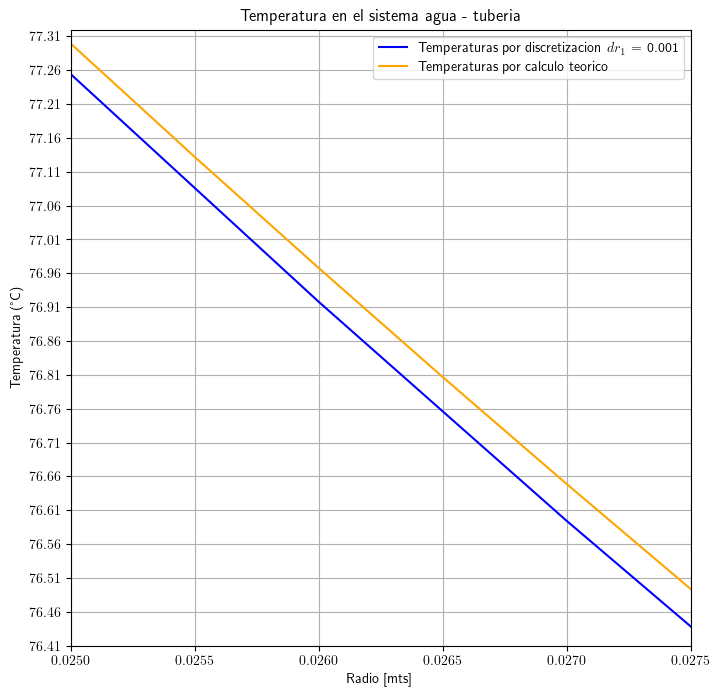

In [830]:
# Plot the temperature distribution
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(8, 8))
plt.plot(r_dr1[1:-1], T_dr1[1:-1], color='blue' , label=r'Temperaturas por discretizacion $dr_1$ = %.3f' % (dr1))
plt.plot(r_dr2[1:-1], obtener_temperaturas_calculadas_teoricamente(r_dr2[1:-1]), color='orange', label='Temperaturas por calculo teorico')
plt.yticks([i for i in np.arange(76.41, 77.32, 0.05)])
plt.ylim([76.41, 77.32])
plt.xlim([0.025, 0.0275])
plt.legend()
plt.title('Temperatura en el sistema agua - tuberia')
plt.xlabel('Radio [mts]')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

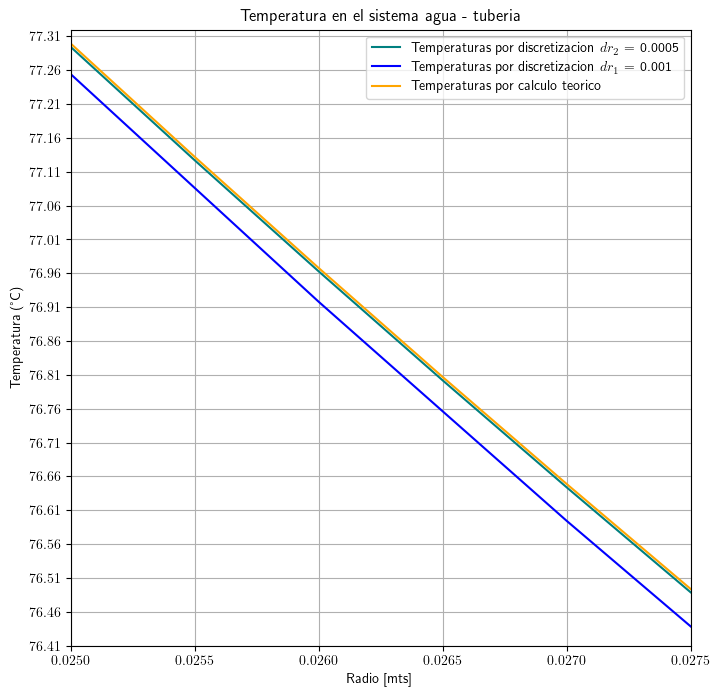

In [831]:
plt.figure(figsize=(8, 8))
plt.plot(r_dr2[1:-1], T_dr2[1:-1], color='teal', label=f'Temperaturas por discretizacion $dr_2$ = %.4f' %(dr2))
plt.plot(r_dr1[1:-1], T_dr1[1:-1], color='blue', label=f'Temperaturas por discretizacion $dr_1$ = %.3f' %(dr1))
plt.plot(r_dr2[1:-1], obtener_temperaturas_calculadas_teoricamente(r_dr2[1:-1]), color='orange', label='Temperaturas por calculo teorico')
plt.yticks([i for i in np.arange(76.41, 77.32, 0.05)])
plt.ylim([76.41, 77.32])
plt.xlim([0.025, 0.0275])
plt.legend()
plt.title('Temperatura en el sistema agua - tuberia')
plt.xlabel('Radio [mts]')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

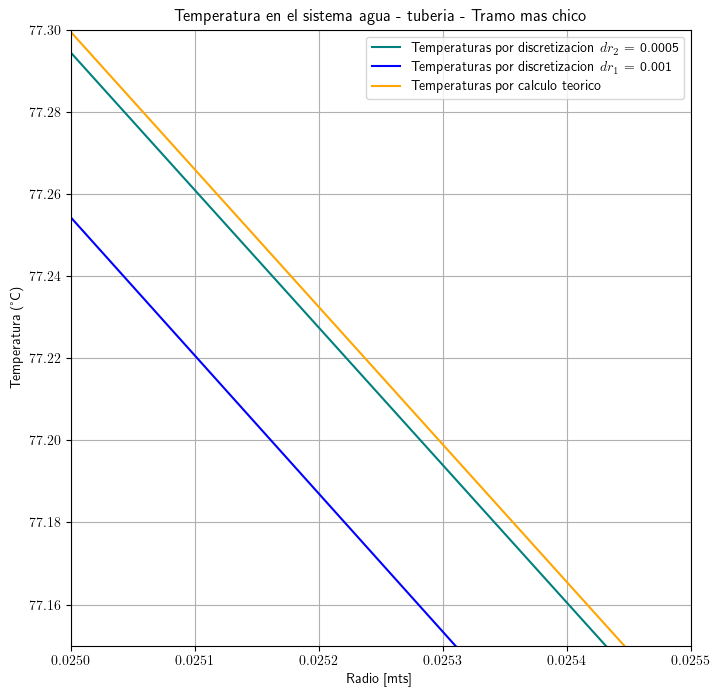

In [832]:
plt.figure(figsize=(8, 8))
plt.plot(r_dr2[1:-1], T_dr2[1:-1], color='teal', label=f'Temperaturas por discretizacion $dr_2$ = %.4f' %(dr2))
plt.plot(r_dr1[1:-1], T_dr1[1:-1], color='blue', label=f'Temperaturas por discretizacion $dr_1$ = %.3f' %(dr1))
plt.plot(r_dr2[1:-1], obtener_temperaturas_calculadas_teoricamente(r_dr2[1:-1]), color='orange',label='Temperaturas por calculo teorico')
plt.ylim([77.15, 77.30])
plt.xlim([0.025, 0.0255])
plt.legend()
plt.title('Temperatura en el sistema agua - tuberia - Tramo mas chico')
plt.xlabel('Radio [mts]')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

In [833]:
# Grafico de errores

# me salvó las papas
# https://stackoverflow.com/questions/32513424/find-intersection-of-numpy-float-arrays
tol = 0.00001

valores_en_ambos_r = r_dr2[(np.abs(r_dr1[:,None] - r_dr2) < tol).any(0)]

T_comun_1 = []
T_comun_2 = []

print(valores_en_ambos_r, r_dr2, r_dr1)
for valor_r in valores_en_ambos_r:
  id1 =  np.abs(r_dr1 - valor_r).argmin() # te devuelve el índice en r_dr1
  id2 =  np.abs(r_dr2 - valor_r).argmin() # te devuelve el índice en r_dr2
  T_comun_1.append(T_dr1[id1])
  T_comun_2.append(T_dr2[id2])

errores_dr1 = np.absolute( np.array(obtener_temperaturas_calculadas_teoricamente(valores_en_ambos_r)) - np.array(T_comun_1) )
errores_dr2 = np.absolute( np.array(obtener_temperaturas_calculadas_teoricamente(valores_en_ambos_r)) - np.array(T_comun_2) )

errores_dr1 = np.absolute(errores_dr1)
errores_dr2 = np.absolute(errores_dr2)


[0.025 0.026 0.027 0.028] [0.0245 0.025  0.0255 0.026  0.0265 0.027  0.0275 0.028 ] [0.024 0.025 0.026 0.027 0.028 0.029]


In [834]:
print(dr1, dr2, dr1 > dr2)

0.001 0.0005 True


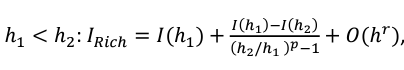

In [835]:
T_richardson = []

for i in range(len(valores_en_ambos_r)):
  #T_richardson.append( T_comun_1[i] + ((T_comun_1[i]-T_comun_2[i])/(((dr2/dr1)**2) - 1) ) )
  T_richardson.append( T_comun_2[i] + ((T_comun_2[i]-T_comun_1[i])/(((dr1/dr2)**2) - 1) ) )

errores_richardson_vs_teorica = np.absolute( np.array(obtener_temperaturas_calculadas_teoricamente(valores_en_ambos_r)) - np.array(T_richardson) )
errores_richardson_vs_dr1 = np.absolute( np.array(T_comun_1) - np.array(T_richardson) )
errores_richardson_vs_dr2 = np.absolute( np.array(T_comun_2) - np.array(T_richardson) )

In [836]:
for( r, t_r, t1, t2 ) in zip(valores_en_ambos_r, T_richardson, T_comun_1, T_comun_2):
  result = np.log( ( (t1-t2)/(t_r - t1) ) + 1 ) / np.log(dr2/dr1)
  print(f'{result}')

1.999999999999617
2.000000000000342
1.9999999999996894
2.0


In [837]:
for valores_r, t in zip(valores_en_ambos_r, T_richardson):
  print(valores_r, t)

0.025 77.30782445877877
0.026000000000000002 76.97785783842885
0.027000000000000003 76.66034581659481
0.028000000000000004 76.35438229177434


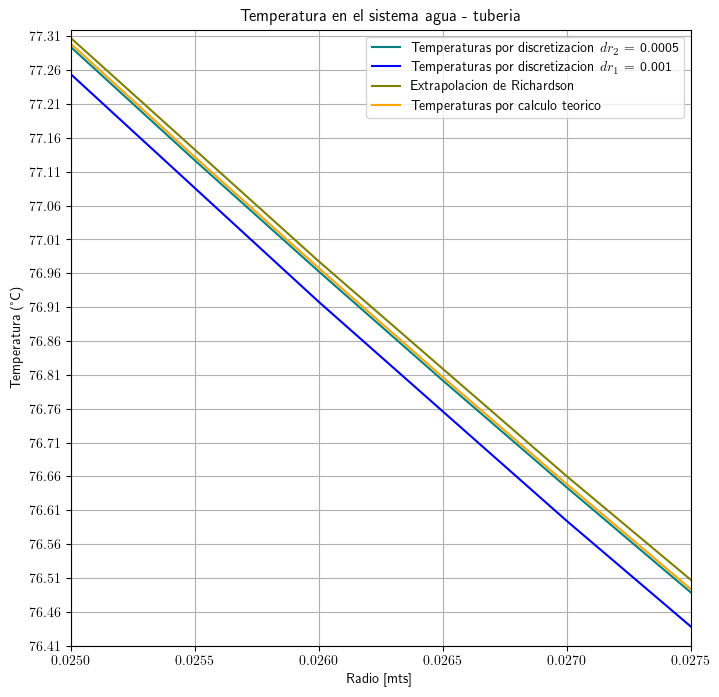

In [838]:
plt.figure(figsize=(8, 8))
plt.plot(r_dr2[1:-1], T_dr2[1:-1], color='teal',label=f'Temperaturas por discretizacion $dr_2$ = %.4f' %(dr2))
plt.plot(r_dr1[1:-1], T_dr1[1:-1], color='blue',label=f'Temperaturas por discretizacion $dr_1$ = %.3f' %(dr1))
plt.plot(valores_en_ambos_r, T_richardson, color='olive', label=f'Extrapolacion de Richardson')
plt.plot(r_dr2[1:-1], obtener_temperaturas_calculadas_teoricamente(r_dr2[1:-1]), color='orange',label='Temperaturas por calculo teorico')
plt.yticks([i for i in np.arange(76.41, 77.32, 0.05)])
plt.ylim([76.41, 77.32])
plt.xlim([0.025, 0.0275])
plt.legend()
plt.title('Temperatura en el sistema agua - tuberia')
plt.xlabel('Radio [mts]')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

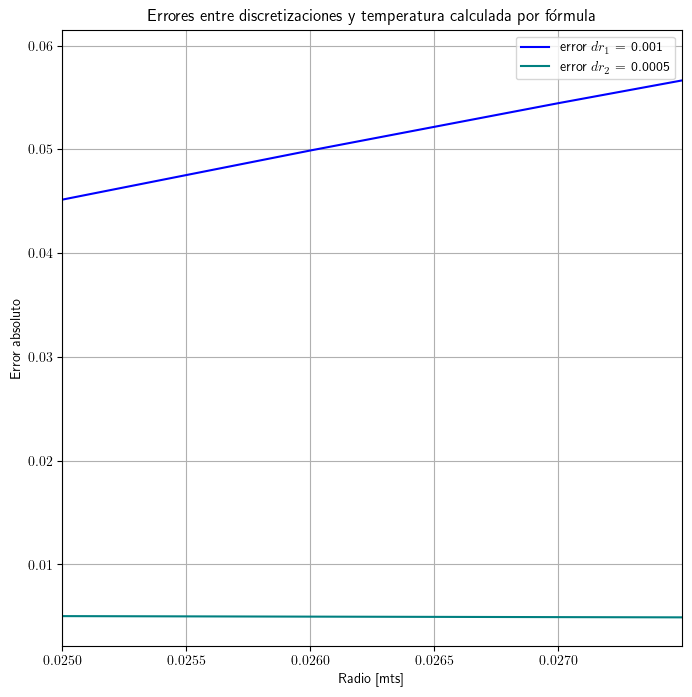

In [839]:
plt.figure(figsize=(8, 8))
plt.plot(valores_en_ambos_r, errores_dr1, color='blue', label=f'error $dr_1$ = %.3f' %(dr1))
plt.plot(valores_en_ambos_r, errores_dr2, color='teal', label=f'error $dr_2$ = %.4f' %(dr2))
#plt.plot(valores_en_ambos_r, errores_richardson_vs_teorica, marker='o', color='olive', label=f'error richardson')
#plt.plot(valores_en_ambos_r, errores_richardson_vs_dr1, marker='o', label=f'error richardson vs dr1')
#plt.plot(valores_en_ambos_r, errores_richardson_vs_dr2, marker='o', label=f'error richardson vs dr2')
plt.xticks([i for i in np.arange(ri, re, 0.0005)])
plt.xlim([0.025, 0.0275])

plt.legend()
plt.title('Errores entre discretizaciones y temperatura calculada por fórmula')
plt.xlabel('Radio [mts]')
plt.ylabel('Error absoluto')
plt.grid(True)
plt.show()

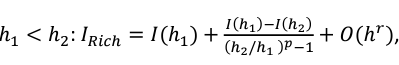

In [840]:
dr3 = dr2 / 2
r_dr3 = np.arange(ri - dr3, re + dr3 + dr3, dr3) # Creamos todos los nodos y los nodos T1 en conjunto con T_n+1 que son los que contienen los datos dados por la conveccion
T_dr3 = resolver_problema_sin_aislante(r_dr3, dr3)

T_comun_3 = [] # Va a contener las temperaturas con los r en comun de dr3

for valor_r in valores_en_ambos_r:
  id3 =  np.abs(r_dr3 - valor_r).argmin() # te devuelve el índice en r_dr3
  T_comun_3.append(T_dr3[id3])

T_richardson_2 = []

for i in range(len(valores_en_ambos_r)):
  T_richardson_2.append( T_comun_3[i] + ((T_comun_3[i]-T_comun_2[i])/(((dr2/dr3)**2) - 1) ) )

errores_richardson2_vs_teorica = np.absolute( np.array(obtener_temperaturas_calculadas_teoricamente(valores_en_ambos_r)) - np.array(T_richardson_2) )


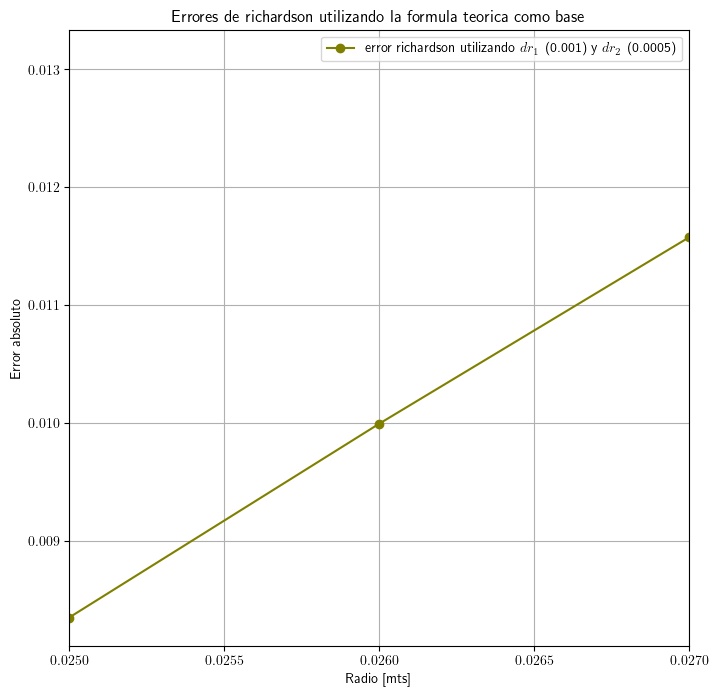

In [823]:
plt.figure(figsize=(8, 8))
plt.plot(valores_en_ambos_r, errores_richardson_vs_teorica, marker='o', color='olive', label=f'error richardson utilizando $dr_1$ (%.3f) y $dr_2$ (%.4f)' % (dr1, dr2))
#plt.plot(valores_en_ambos_r, errores_richardson2_vs_teorica, marker='o', color='rosybrown', label=f'error richardson utilizando $dr_2$ (%.4f) y $dr_3$ (%.5f)' % (dr2, dr3))
plt.xticks([i for i in np.arange(ri, re, 0.0005)])
#plt.yticks([i for i in np.arange(0.0130, 0.017, 0.0005)])
plt.xlim([0.025, 0.0270])
#plt.ylim([0.00, 0.02])
plt.legend()

plt.title('Errores de richardson utilizando la formula teorica como base')
plt.xlabel('Radio [mts]')
plt.ylabel('Error absoluto')
plt.grid(True)
plt.show()

In [841]:
for( r, t_r, t1, t2 ) in zip(valores_en_ambos_r, T_richardson_2, T_comun_2, T_comun_3):
  result = np.log( ((t1-t2)/(t_r - t1)) + 1 ) / np.log(dr3/dr2)
  print(f'{result}')

2.000000000420157
2.0
2.0
2.0


# Parte 2) Los coeficientes K cambian sobre la región donde se discretiza

In [842]:
r_i = 0.025 ## radio interno cañeria
r_e = 0.0275 ## radio externo cañeria
r_e_aislante = 0.075 # radio externo aislante

dr = 0.0001

r = np.arange(ri - dr, r_e_aislante + dr, dr) # Creamos todos los nodos y los nodos T1 en conjunto con T_n+1 que son los que contienen los datos dados por la conveccion
N = len(r)

valores_k = [ k_acero if valor_r <= re else k_aislante for valor_r in r ] # Creamos un array con los distintos valores de K posibles para las posiciones

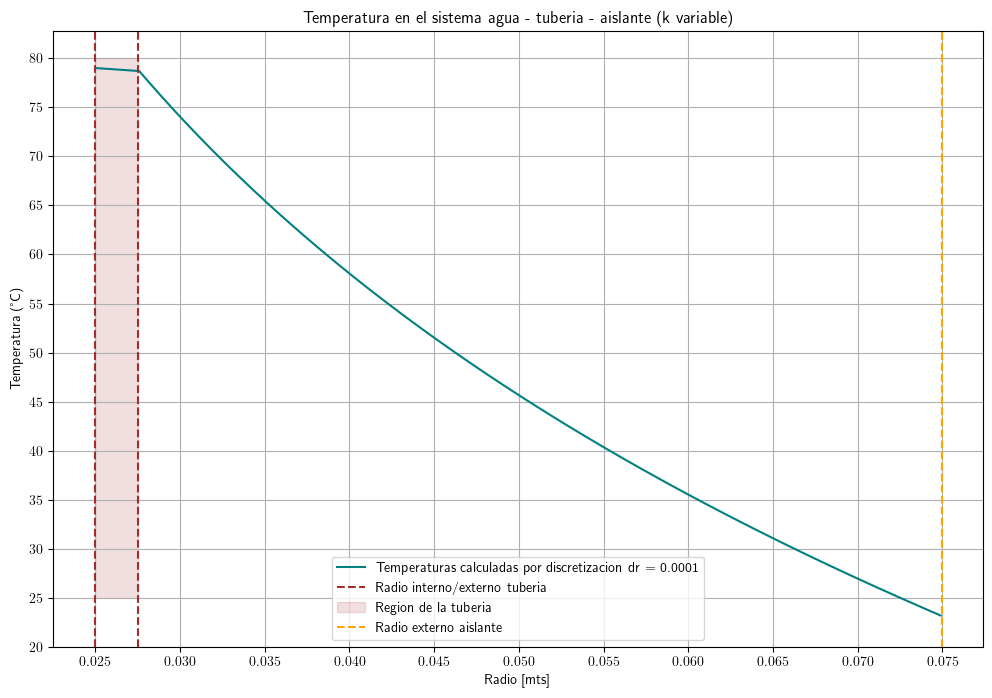

In [843]:
# inicializo la matriz
A = np.zeros((N, N))
B = np.zeros(N)

#Las condiciones de contorno se mantienen para el mismo caso que se aplique un aislante, cambia la resolucion adentro del bucle.
A[0, 0] = k_acero / (2*dr)
A[0, 1] = hi
A[0, 2] = -k_acero / (2*dr)
B[0] = hi * T_agua_inf

A[N-1, N-3] = k_aislante/(2*dr)
A[N-1, N-2] = -he
A[N-1, N-1] = -k_aislante/(2*dr)
B[N-1] = -he * T_aire_inf

for i in range(1, N - 1):
    A[i, i-1] = (1/(4*(dr ** 2))) * ( (valores_k[i] + valores_k[i-1]) * (r[i] + r[i-1]) )
    A[i, i]   = (1/(4*(dr ** 2))) * ( -( (valores_k[i+1]+valores_k[i]) * (r[i+1]+r[i]) ) - ( (valores_k[i]+valores_k[i-1])*(r[i]+r[i-1]) ) )
    A[i, i+1] = (1/(4*(dr ** 2))) * ( ((valores_k[i+1]+valores_k[i])*(r[i]+r[i+1])) )
    B[i] = 0

#Ahora sí, tengo A, B, tengo que calcular Ax = B
T = np.linalg.solve(A, B)

plt.figure(figsize=(12, 8))
plt.plot(r[1:-1], T[1:-1], color='teal', label=f'Temperaturas calculadas por discretizacion dr = {dr}')
plt.title('Temperatura en el sistema agua - tuberia - aislante (k variable)')
plt.axvline(x = r_i, color = 'brown', linestyle = '--', label = "Radio interno/externo tuberia")

plt.fill_between([ri, re], y1=25, y2=80,color='brown', alpha=.15, label = "Region de la tuberia")

plt.axvline(x = r_e, color = 'brown', linestyle = '--')
plt.axvline(x = r_e_aislante, color = 'orange', linestyle = '--', label = "Radio externo aislante")
plt.yticks([i for i in range(20, 85, 5)])
plt.xticks([i for i in np.arange(r_i, r_e_aislante + 0.005, 0.005)])
#plt.yscale("log")
plt.xlabel('Radio [mts]')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend()
plt.show()


# Parte 2B) Determinacion del expesor del aislante


In [844]:
L = 78.2
Qa = 0.0005
Rho_a = 1000
C_p_a = 4200

indice_temperatura_inicial = np.abs(r - ri).argmin()
expesor_buscado_index = np.abs(r - re).argmin() + 1 # Arrancamos desde la posicion externa

while True:
  T_a_out = T_agua_inf - ( ( hi*(T_agua_inf - T[indice_temperatura_inicial]) * 2 * np.pi * L * ri ) / (Qa * Rho_a * C_p_a) )

  if( (T_agua_inf - T_a_out) < 20 and T[expesor_buscado_index] < 40 ):
    print(f"Con expesor mayor o igual a {r[expesor_buscado_index]:.4f} se logra tener una temperatura menor a 40°C en el exterior del aislante")
    break;

  expesor_buscado_index += 1



Con expesor mayor o igual a 0.0554 se logra tener una temperatura menor a 40°C en el exterior del aislante
